In [13]:
# Classification Models Comparison
# Tree-Based Models and KNN
# Step 1: Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [14]:
# Step 2: Load Classification Dataset
# categorical target: species
iris = load_iris()
X = iris.data
y = iris.target

In [15]:
# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [21]:
# Step 4: Tree-Based Models
tree_models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}
results = []
for model_name, model in tree_models.items():

    # Train model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    # Store results
    results.append([
        model_name, accuracy, precision, recall, f1
    ])
print("\nTree-Based Model Performance:\n")
print(results_df)


Tree-Based Model Performance:

               Model  Accuracy  Precision  Recall  F1-score
0      Decision Tree       1.0        1.0     1.0       1.0
1      Random Forest       1.0        1.0     1.0       1.0
2  Gradient Boosting       1.0        1.0     1.0       1.0
3          KNN (k=1)       1.0        1.0     1.0       1.0


In [17]:
# Step 5: K-Nearest Neighbors 
k_values = range(1, 21)
knn_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    knn_accuracies.append(accuracy_score(y_test, y_pred))
    
# Optimal k
optimal_k = k_values[np.argmax(knn_accuracies)]
best_accuracy = max(knn_accuracies)

print("K values tested:", list(k_values))
print("Accuracies:", knn_accuracies)
print("\nOptimal value of k:", optimal_k)
print("Best Accuracy:", best_accuracy)

# Train KNN with optimal k
knn_best = KNeighborsClassifier(n_neighbors=optimal_k)
knn_best.fit(X_train, y_train)
y_pred_knn = knn_best.predict(X_test)

# KNN metrics
results.append([
    f"KNN (k={optimal_k})",
    accuracy_score(y_test, y_pred_knn),
    precision_score(y_test, y_pred_knn, average="weighted"),
    recall_score(y_test, y_pred_knn, average="weighted"),
    f1_score(y_test, y_pred_knn, average="weighted")
])

K values tested: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Accuracies: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Optimal value of k: 1
Best Accuracy: 1.0


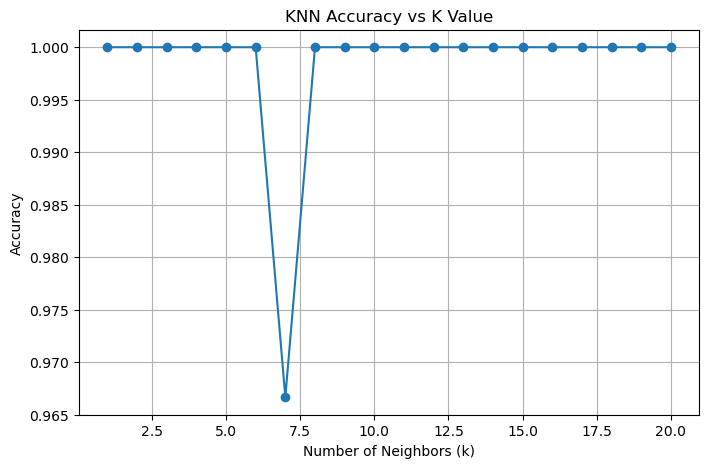

In [18]:
# Step 6: K vs Accuracy Plot
plt.figure(figsize=(8, 5))
plt.plot(k_values, knn_accuracies, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs K Value")
plt.grid(True)
plt.show()

In [19]:
# Step 7: Results Table
results_df = pd.DataFrame(
    results,
    columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"]
)
print("\nModel Performance Comparison:\n")
print(results_df)


Model Performance Comparison:

               Model  Accuracy  Precision  Recall  F1-score
0      Decision Tree       1.0        1.0     1.0       1.0
1      Random Forest       1.0        1.0     1.0       1.0
2  Gradient Boosting       1.0        1.0     1.0       1.0
3          KNN (k=1)       1.0        1.0     1.0       1.0
